Akurasi: 0.7861020629750272
Laporan klasifikasi:
              precision    recall  f1-score   support

           0       0.80      0.84      0.82       531
           1       0.76      0.72      0.74       390

    accuracy                           0.79       921
   macro avg       0.78      0.78      0.78       921
weighted avg       0.79      0.79      0.79       921



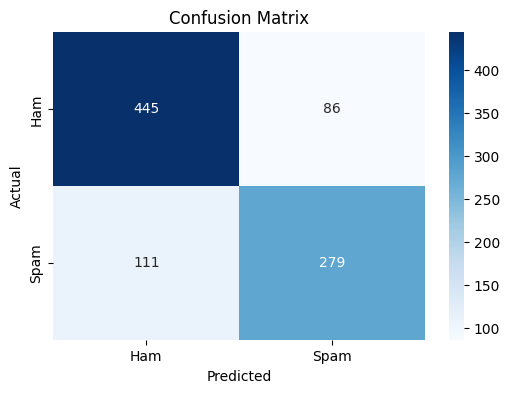

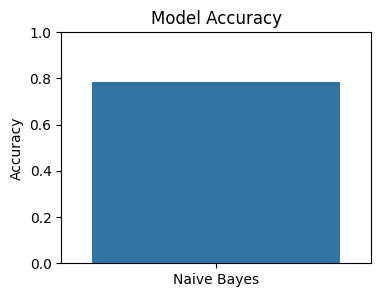

In [3]:
# 1. Install library (jika belum terinstal di Google Colab)
!pip install -q seaborn

# 2. Import library yang diperlukan
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# 3. Load dataset Spambase dari UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
columns = [f'feature_{i}' for i in range(57)] + ['label']
data = pd.read_csv(url, header=None, names=columns)

# 4. Pisahkan fitur dan target
X = data.drop('label', axis=1)
y = data['label']  # 1 = spam, 0 = ham

# 5. Split data latih & uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 6. Latih model Naive Bayes
model = MultinomialNB()
model.fit(X_train, y_train)

# 7. Prediksi dan evaluasi
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Akurasi:", acc)
print("Laporan klasifikasi:")
print(classification_report(y_test, y_pred))

# 8. Visualisasi: Confusion Matrix
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,4))
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=["Ham", "Spam"], yticklabels=["Ham", "Spam"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# 9. Visualisasi: Akurasi dalam bentuk bar chart
plt.figure(figsize=(4,3))
sns.barplot(x=["Naive Bayes"], y=[acc])
plt.ylim(0, 1)
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.show()
